Import libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import data.

In [3]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Geant.csv')
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,...,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498,Column499,Column500,Column501,Column502,Column503,Column504,Column505,Column506,Column507,Column508,Column509,Column510,Column511,Column512,Column513,Column514,Column515,Column516,Column517,Column518,Column519,Column520,Column521,Column522,Column523,Column524,Column525,Column526,Column527,Column528,Column529,Column530
0,2005-01-01-00-30,69.6444,20232.5778,122882.9333,25398.7289,325161.9022,13041.9644,16813.0489,187022.5333,365524.2311,0,5091.1111,33923.5822,1213.1200,7642.2400,2557.2444,18046.4444,26558.4978,17600.1156,7761.5644,499.6178,18755.7244,5076.4533,161.7600,14142.2844,1586.9422,6252.6133,132563.3511,1511.7067,12279.9289,15073.8311,1529.6000,2004.0978,0,9734.6133,178123.7422,14447.5378,2080.6756,1119.7867,12772.6667,...,1408.3911,2081.3333,7746.8711,0,2355.0578,11452.6400,7176.2133,115.4222,0,0.4267,7424.1511,409.8933,196.6311,0,1213.6444,0,76.7556,185.4489,66.2044,1071.1911,82.0178,0.3556,4.8089,1312.4356,271.6800,1019.6711,0,1366.7289,1232.5156,484.9511,13.0844,393.1378,208.6933,2654.8622,446.6756,123.5911,2160.0533,1621.0133,550.9333,0
1,2005-01-01-00-45,87.2711,13492.2667,92576.8000,24758.3378,293427.0667,10384.0089,16609.5556,168308.5244,338674.7822,0,1526.0089,25269.6800,996.1244,2635.9022,2160.6222,15725.7778,22361.1556,18284.4267,2086.2311,6547.6178,24662.7378,3860.5067,78.8089,12989.1644,1364.3911,6590.3911,121773.3067,1301.7333,10816.8356,8940.8000,836.4267,2595.7689,0,7666.5511,175069.7333,13046.5067,1701.8756,787.8222,11760.6133,...,1361.8400,2870.1422,5123.8133,0,2645.8400,14154.3644,5430.1156,134.4711,0,5.4578,5401.1644,598.5333,79.6889,0,1355.5911,0,38.8178,105.7422,100.4978,872.9156,55.9556,27.3778,1.9200,620.1067,301.1556,725.9378,0,855.4222,533.8222,852.8444,13.6889,63.0756,729.5289,2076.1689,144.2667,285.4311,93.6889,1112.3200,431.0933,0
2,2005-01-01-01-00,90.9778,9087.5911,91189.7244,22493.5111,286134.1333,11318.3467,13874.8089,174435.7867,346972.5156,0,11301.7156,21662.0622,4139.5556,1487.6000,2212.5333,12089.0311,19506.1333,16593.1822,3684.4444,1617.0489,25586.6489,3680.8444,189.6089,9561.0578,1439.0400,16550.4800,128867.0756,1753.8756,10370.9600,8462.0356,1881.2356,1863.0756,0,7352.1156,181299.0756,13926.4000,1165.0222,823.4400,11750.9333,...,2993.9111,2901.5378,3350.7733,0,2066.0267,10839.0222,4885.1289,18.0089,0,12.1422,8038.7556,266.6400,184.9511,0,1077.1911,0,139.6000,185.7600,259.8489,984.4800,147.2000,115.0578,0.9600,1496.7467,206.7911,473.7600,0,380.5778,411.4311,517.9911,76.7289,27.6622,265.8044,3000.2133,490.6044,136.4444,37.5911,1776.4800,181.8133,0
3,2005-01-01-01-15,61.9111,8170.8533,88612.8000,21266.4356,293284.5689,10474.4889,8959.4044,171889.7067,343563.6444,0,89923.8133,18537.1378,1675.3867,1661.6800,3061.4311,13757.4667,18116.2311,18242.4800,2044.9689,731.7067,32107.6978,3408.6844,135.1289,9873.0578,1515.5733,15798.1689,134174.7111,2556.0622,9418.1244,10764.1067,597.4400,2073.9911,0,4395.6711,176180.9067,6026.8889,1841.7956,489.9289,12868.7733,...,1832.3733,2951.6800,2150.4533,0,1881.5200,10524.6489,5365.9644,86.9422,0,2.2400,4987.4044,603.5378,472.1333,0,2912.6044,0,87.6889,75.7689,34.1778,757.5022,60.7289,519.4044,2.2044,2342.4178,110.0356,442.5422,0,118.3289,782.0000,620.3556,0.3556,545.6000,41.6889,3270.6400,714.8444,80.8978,1889.6089,842.5600,193.1378,0
4,2005-01-01-01-30,70.3022,10583.6000,59640.5244,27762.3911,297451.9378,9275.0400,7836.8622,174344.0800,337112.0889,0,5539.5733,17851.5200,1957.5644,1592.2578,2862.8533,12355.5733,12629.2267,17946.5067,329.5733,411.3067,41706.4356,3398.6311,132.2489,10357.2267,1208.1689,6579.9289,139756.8533,3242.

Remove time column.

In [4]:
data_columns = list(df.columns.values)
data_columns.remove('Column1')
dataset = df[data_columns].values.astype('float32')
dataset

array([[6.9644402e+01, 2.0232578e+04, 1.2288293e+05, ..., 1.6210133e+03,
        5.5093329e+02, 0.0000000e+00],
       [8.7271103e+01, 1.3492267e+04, 9.2576797e+04, ..., 1.1123199e+03,
        4.3109329e+02, 0.0000000e+00],
       [9.0977798e+01, 9.0875908e+03, 9.1189727e+04, ..., 1.7764800e+03,
        1.8181329e+02, 0.0000000e+00],
       ...,
       [9.3806934e+03, 7.0348799e+03, 8.0728897e+01, ..., 1.2622200e+01,
        7.5515558e+02, 0.0000000e+00],
       [1.1783005e+04, 1.4657067e+03, 1.3084441e+02, ..., 2.5706699e+01,
        2.8492441e+02, 0.0000000e+00],
       [1.2486498e+04, 3.4376267e+03, 2.6299561e+02, ..., 9.0951103e+01,
        4.7697800e+01, 0.0000000e+00]], dtype=float32)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
#train_size=263
test_size = len(dataset) - train_size
train_data = dataset[0:train_size,:]
test_data = dataset[train_size:len(dataset),:]
test_data

array([[0.1209615 , 0.04115408, 0.00064999, ..., 0.00618022, 0.01692496,
        0.        ],
       [0.17228493, 0.00928773, 0.00018749, ..., 0.00933321, 0.03163413,
        0.        ],
       [0.0694995 , 0.00492386, 0.00072022, ..., 0.02550906, 0.01817329,
        0.        ],
       ...,
       [0.08064225, 0.0789292 , 0.00042978, ..., 0.        , 0.1412158 ,
        0.        ],
       [0.10133218, 0.00684064, 0.00071318, ..., 0.00308592, 0.05328151,
        0.        ],
       [0.10739102, 0.03236559, 0.00146049, ..., 0.01847352, 0.0089196 ,
        0.        ]], dtype=float32)

In [6]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-10):
	    a = dataset[i:i+10, :]
	    dataX.append(a)
	    dataY.append(dataset[i + 10, :])
    return np.array(dataX), np.array(dataY)


trainX, trainY = create_dataset(train_data)
testX, testY = create_dataset(test_data)

In [22]:
lstm_model = Sequential()
lstm_model.add(LSTM(500,input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(529, activation='relu'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 500)               2060000   
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 529)              

In [23]:
lstm_3=lstm_model.fit(trainX, trainY, epochs=20, validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 3s 241ms/step - loss: 0.0639 - val_loss: 0.0423
Epoch 2/20
6/6 [==============================] - 1s 192ms/step - loss: 0.0496 - val_loss: 0.0287
Epoch 3/20
6/6 [==============================] - 1s 188ms/step - loss: 0.0347 - val_loss: 0.0286
Epoch 4/20
6/6 [==============================] - 1s 184ms/step - loss: 0.0323 - val_loss: 0.0264
Epoch 5/20
6/6 [==============================] - 1s 181ms/step - loss: 0.0310 - val_loss: 0.0257
Epoch 6/20
6/6 [==============================] - 1s 190ms/step - loss: 0.0304 - val_loss: 0.0254
Epoch 7/20
6/6 [==============================] - 1s 190ms/step - loss: 0.0302 - val_loss: 0.0254
Epoch 8/20
6/6 [==============================] - 1s 182ms/step - loss: 0.0298 - val_loss: 0.0252
Epoch 9/20
6/6 [==============================] - 1s 183ms/step - loss: 0.0296 - val_loss: 0.0251
Epoch 10/20
6/6 [==============================] - 1s 191ms/step - loss: 0.0295 - val_loss: 0.0250
Epoch 11/20
6/6 [==

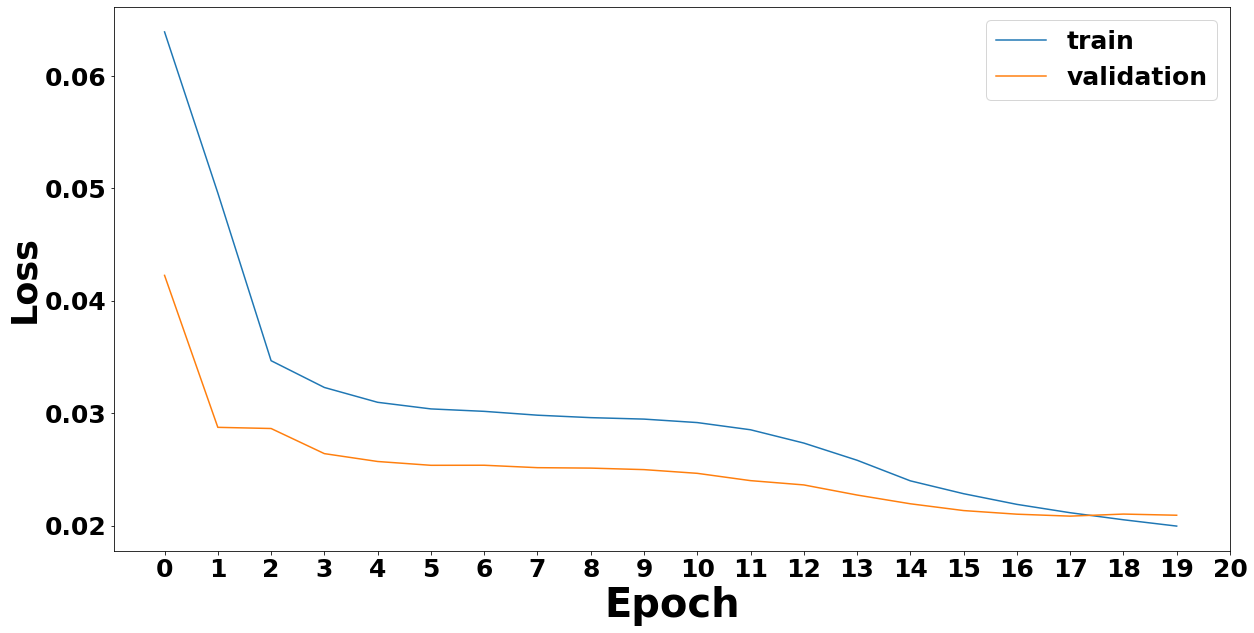

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(lstm_3.history['loss'], label='train')
plt.plot(lstm_3.history['val_loss'], label='validation')
plt.ylabel('Loss', fontweight='bold', fontsize=35)
plt.xlabel('Epoch', fontweight='bold', fontsize = 40)
plt.xticks(range(0,21))
plt.legend()
plt.show()

Predict 

In [25]:
predY = lstm_model.predict(testX)


Calculate MSE

In [26]:
mse = mean_squared_error(predY, testY)
print('MSE: %.5f' % mse)

MSE: 0.02596


In [27]:
inv_predY=scaler.inverse_transform(predY)
inv_predY.shape
inv_testY=scaler.inverse_transform(testY)
inv_predY_0 = inv_predY[10,:]
inv_predY_0.shape

(529,)

In [28]:
inv_testY_0 = inv_testY[10,:]
inv_testY_0.shape

(529,)

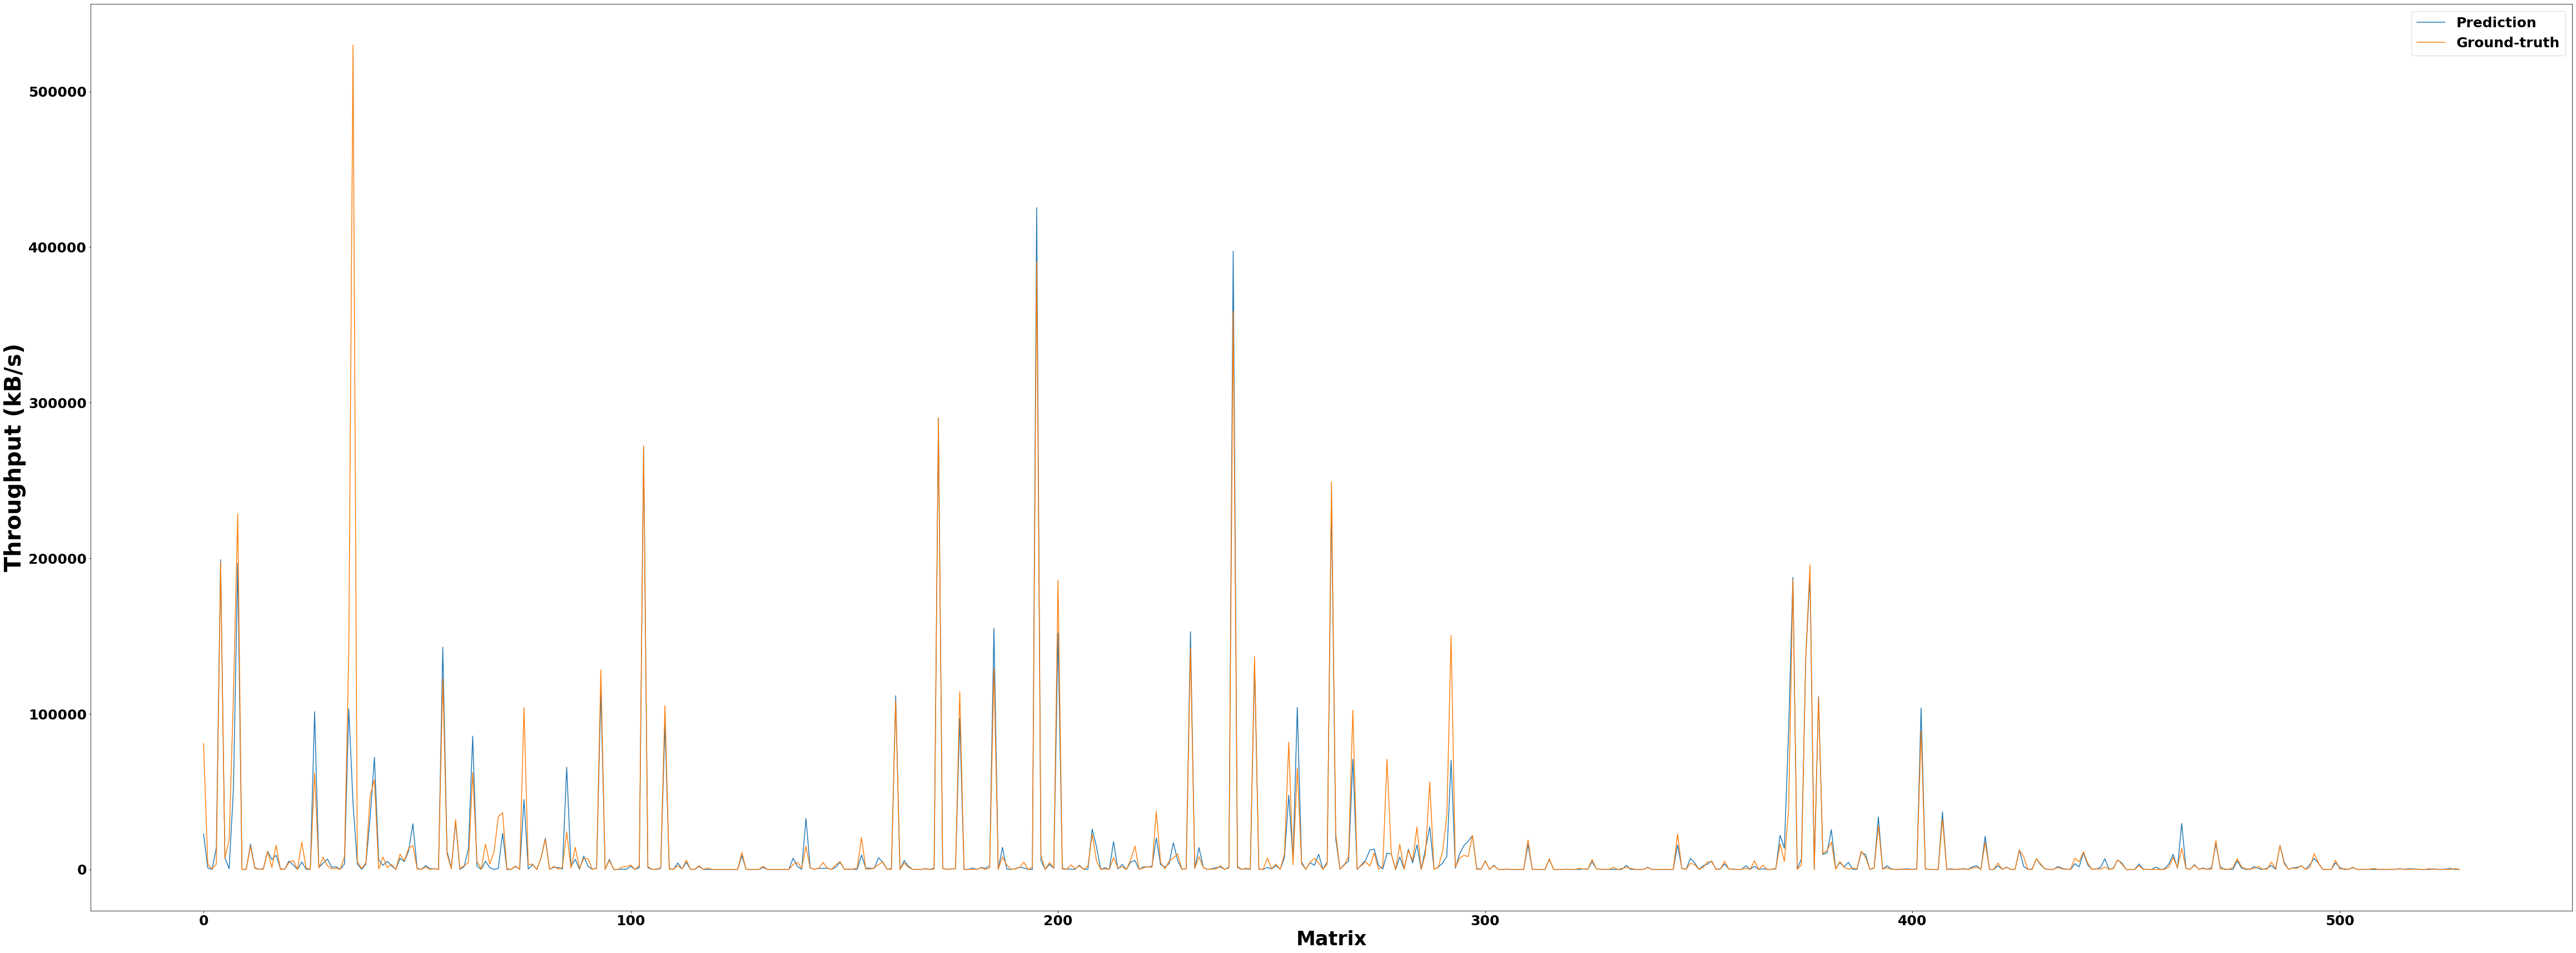

In [29]:
plt.rcParams["figure.figsize"] = (80,30)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(inv_predY_0[0:600], label = "Prediction")
plt.plot(inv_testY_0[0:600], label = "Ground-truth")
plt.xlabel('Matrix', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()